<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/ProblemSets/Modeling(Environmental%2BSpatial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
from matplotlib.pyplot import quiver
import numpy.random as rng

from matplotlib.pyplot import imshow
from numpy.random import multivariate_normal as mvn

Mounted at /content/gdrive


- multiply the flow values by 25/0.9 to get a unit of cm/second (cmps)
- matrix index (0, 0) corresponds in this problem to the coordinate (0km, 0km), or the *bottom, left* of the plot
- The time interval between any two data snapshots is 3 hours
- The grid spacing used is 3 kilometers

https://www.jameelmerali.com/machine-learning/2021/06/28/Ocean-Flow/
https://github.com/jmerali3/Ocean_Flow/blob/main/OceanFlow.py

# **a)** 
Average flow values: average horizontal flow (u) across time periods & average vertical flow (v) across time periods (i.e., 1/T times the sum of all u(t) and 1/T times the sum of all v(t)).

In [ ]:
t_array = list(range(1,101))
u_dfs = []
v_dfs = []
for i in t_array:
  u = pd.read_csv('/content/gdrive/MyDrive/ps5/Data/'+ str(i) +'u.csv')
  u.set_axis(list(range(555)),axis=1,inplace=True)
  u_dfs.append(u)
  v = pd.read_csv('/content/gdrive/MyDrive/ps5/Data/'+ str(i) +'v.csv')
  v.set_axis(list(range(555)),axis=1,inplace=True)
  v_dfs.append(v)
u_sum = sum(u_dfs)
v_sum = sum(v_dfs)
u_flow = (u_sum/(300*3600)).to_numpy()
v_flow = (v_sum/(300*3600)).to_numpy()
mask = pd.read_csv('/content/gdrive/MyDrive/ps5/Data/mask.csv')

In [ ]:
maginude_average_flow = np.sqrt(u_flow**2 + v_flow**2)

speed_dfs = []
for i in range(100):
  speed = np.sqrt((u_dfs[i]*(25/0.9))**2 + (v_dfs[i]*(25/0.9))**2)
  speed_dfs.append(speed)
ave_speed = sum(speed_dfs)/100

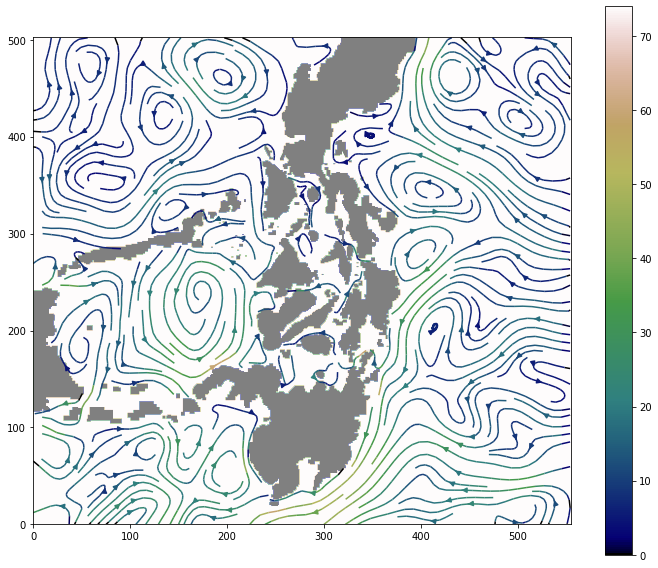

In [ ]:
fig = plt.figure(figsize =(10, 8))
x, y= np.meshgrid(np.arange(0,555,1),np.arange(0,503,1))
 
# Varying color along a streamline
land = plt.imshow(np.flipud(mask.to_numpy()), alpha=0.5, cmap='gist_earth')
strm = plt.streamplot(x,y,u_flow,v_flow, color = ave_speed.to_numpy(), cmap = 'gist_earth', density=2)
fig.colorbar(strm.lines)
 
# show plot
plt.xlim([0, 555])
plt.ylim([0, 503])
plt.tight_layout()
plt.show()

# **b)**
Average speed of the flow: speed s(t) of the flow at time t is defined as the square root of the sum of u(t)^2 and v(t)^2. Average speed is 1/T times the sum of s(t).

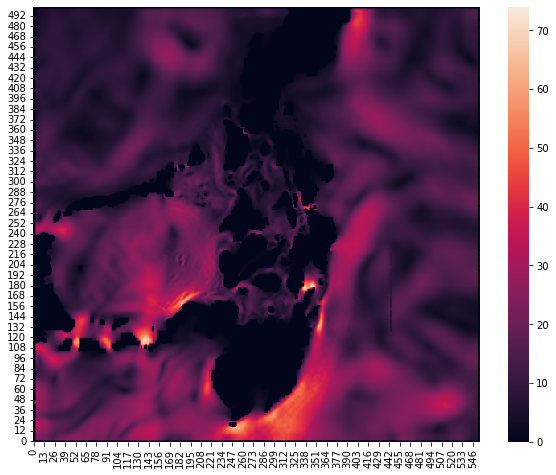

In [ ]:
import seaborn as sns
fig = plt.figure(figsize =(10, 8))
ax = sns.heatmap(ave_speed)
ax.invert_yaxis()

#**c)**


In [ ]:
'''x_i = pd.DataFrame(list(range(555)))
y_i = pd.DataFrame(list(range(503)))
y_i['ones'] = 1
x_i['ones'] = 1
x_i = x_i.rename(columns={0:'x'})
y_i = y_i.rename(columns={0:'y'})
df_pairs = pd.merge(x_i, y_i, how = 'outer', on = 'ones')
df_pairs = df_pairs.drop(labels='ones', axis = 1)
df_pairs['d'] = np.sqrt(((df_pairs['x']-400)**2)+((df_pairs['y']-400)**2))
#df_pairs = df_pairs.sort_values('d')
df_pairs = df_pairs.round(decimals=0)
df_pairs['corr'] = 0
#df_pairs = df_pairs.reset_index()
#df_pairs = df_pairs[df_pairs['d'] <= 100.0]'''

"x_i = pd.DataFrame(list(range(555)))\ny_i = pd.DataFrame(list(range(503)))\ny_i['ones'] = 1\nx_i['ones'] = 1\nx_i = x_i.rename(columns={0:'x'})\ny_i = y_i.rename(columns={0:'y'})\ndf_pairs = pd.merge(x_i, y_i, how = 'outer', on = 'ones')\ndf_pairs = df_pairs.drop(labels='ones', axis = 1)\ndf_pairs['d'] = np.sqrt(((df_pairs['x']-400)**2)+((df_pairs['y']-400)**2))\n#df_pairs = df_pairs.sort_values('d')\ndf_pairs = df_pairs.round(decimals=0)\ndf_pairs['corr'] = 0\n#df_pairs = df_pairs.reset_index()\n#df_pairs = df_pairs[df_pairs['d'] <= 100.0]"

Text(0, 0.5, 'Correlation')

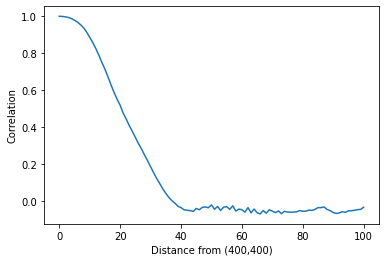

In [ ]:
speed_dfs[0] = speed_dfs[0].reset_index()
df_pairs2 = speed_dfs[0].melt(id_vars = ['index'])
df_pairs2 = df_pairs2.rename(columns={'value':0})
for i in range(1,100):
  speed_dfs[i] = speed_dfs[i].reset_index()
  df_pairs2[i] = speed_dfs[i].melt(id_vars = ['index'])['value']
df_pairs2['d'] = np.sqrt(((df_pairs2['index'].astype(float)-400)**2)+((df_pairs2['variable'].astype(float)-400)**2))
df_pairs2 = df_pairs2.sort_values('d')
df_pairs2['d'] = df_pairs2['d'].round(decimals=0)
df_pairs2 = df_pairs2[df_pairs2['d'] <= 100.0]
df_pairs2 = df_pairs2.reset_index()
df_pairs2 = df_pairs2.drop(columns = 'level_0')
corr400 = df_pairs2.drop(columns = ['index','variable','d'])
corr400['corr'] = corr400.corrwith(corr400.iloc[0], axis = 1)
df_pairs2['corr'] = corr400['corr']
plt.plot(df_pairs2.groupby('d').mean()['corr'])
plt.xlabel('Distance from (400,400)')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

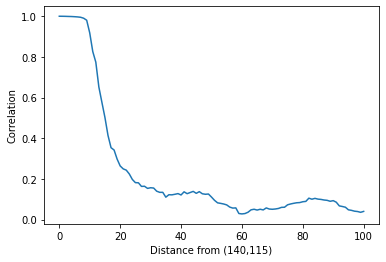

In [ ]:
df_pairs3 = speed_dfs[0].melt(id_vars = ['index'])
df_pairs3 = df_pairs3.rename(columns={'value':0})
for i in range(1,100):
  df_pairs3[i] = speed_dfs[i].melt(id_vars = ['index'])['value']
df_pairs3['d'] = np.sqrt(((df_pairs3['index'].astype(float)-115)**2)+((df_pairs3['variable'].astype(float)-140)**2))
df_pairs3 = df_pairs3.sort_values('d')
df_pairs3['d'] = df_pairs3['d'].round(decimals=0)
df_pairs3 = df_pairs3[df_pairs3['d'] <= 100.0]
df_pairs3 = df_pairs3.reset_index()
df_pairs3 = df_pairs3.drop(columns = 'level_0')
corr140 = df_pairs3.drop(columns = ['index','variable','d'])
corr140['corr'] = corr140.corrwith(corr140.iloc[0], axis = 1)
df_pairs3['corr'] = corr140['corr']
plt.plot(df_pairs3.groupby('d').mean()['corr'])
plt.xlabel('Distance from (140,115)')
plt.ylabel('Correlation')

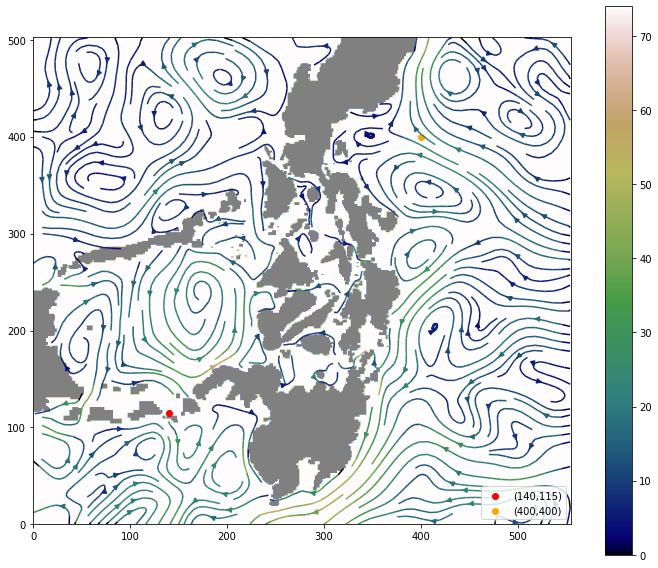

In [ ]:
fig = plt.figure(figsize =(10, 8))
land = plt.imshow(np.flipud(mask.to_numpy()), alpha=0.5, cmap='gist_earth')
strm = plt.streamplot(x,y,u_flow,v_flow, color = ave_speed.to_numpy(), cmap = 'gist_earth', density=2)
fig.colorbar(strm.lines)
plt.scatter(140,115, color='red', label = '(140,115)')
plt.scatter(400,400, color='orange', label = '(400,400)')
# show plot
plt.legend()
plt.xlim([0, 555])
plt.ylim([0, 503])
plt.tight_layout()
plt.show()

#**5.2a**

In [ ]:
# Time lingspace 
T = list(range(18000))
# Initial positions 
px = 400*3000  
py = 300*3000
# Inital list of positions 
px_list = [px]
py_list = [py]
for t in T:
  # Time to look at for flows
  z = int(np.floor(t/180))
  # Position in flow grids 
  rx = int(np.floor(px/3000))
  ry = int(np.floor(py/3000))
  # Flow values at that time at that position
  fx = u_dfs[z].iloc[ry,rx]*(15/0.9) 
  fy = v_dfs[z].iloc[ry,rx]*(15/0.9)
  # Move: changes to position
  px += fx
  py += fy
  # Keeping track of trajectory
  px_list.append(px)
  py_list.append(py)

px_list = np.divide(px_list,3000)
py_list = np.divide(py_list,3000)

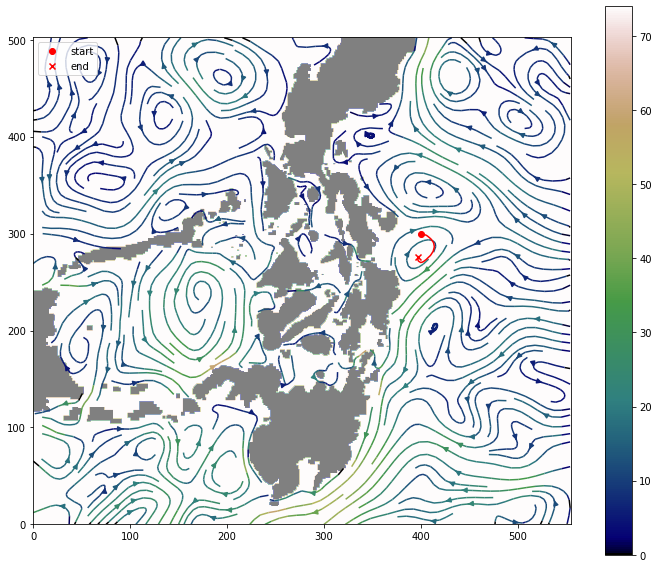

In [ ]:
fig = plt.figure(figsize =(10, 8))
land = plt.imshow(np.flipud(mask.to_numpy()), alpha=0.5, cmap='gist_earth')
strm = plt.streamplot(x,y,u_flow,v_flow, color = ave_speed.to_numpy(), cmap = 'gist_earth', density=2)
fig.colorbar(strm.lines)
plt.plot(px_list,py_list, color='red')
plt.scatter(px_list[0],py_list[0],marker='o',color='red',label='start')
plt.scatter(px_list[-1],py_list[-1],marker='x',color='red',label = 'end')
# show plot
plt.legend()
plt.xlim([0, 555])
plt.ylim([0, 503])
plt.tight_layout()
plt.show()
fig.savefig('/content/gdrive/MyDrive/ps5/'+'('+str(px_list[0])+','+str(py_list[0])+')'+'.png')

# 5.2 b)

In [ ]:
def movement(h, pxi, pyi):
  T = list(range(h*60))
  px = pxi*3000 #Initial position (m)
  py = pyi*3000
  for t in T:
    z = int(np.floor(t/180))
    rx = int(np.floor(px/3000))
    ry = int(np.floor(py/3000))
    fx = u_dfs[z].iloc[ry,rx]*(15/0.9)
    fy = v_dfs[z].iloc[ry,rx]*(15/0.9)
    px += fx
    py += fy

  px = px/3000
  py = py/3000
  
  return px,py

In [ ]:
movement(300, 350, 100)

(252.99864427777166, 19.89518290555281)

In [ ]:
ux = 100
uy = 350
var = 0
n = 100
finalxs48 = []
finalys48 = []
finalxs72 = []
finalys72 = []
finalxs120 = []
finalys120 = []

#G --> points 
x = rng.normal(ux, var, n)
y = rng.normal(uy, var, n)
points = list(zip(x, y))

for point in points:
  px48, py48 = movement(48, point[0], point[1])
  px72, py72 = movement(72, point[0], point[1])
  px120,py120 = movement(120, point[0], point[1])
  finalxs48.append(px48)
  finalxs72.append(px72)
  finalxs120.append(px120)
  finalys48.append(py48)
  finalys72.append(py72)
  finalys120.append(py120)

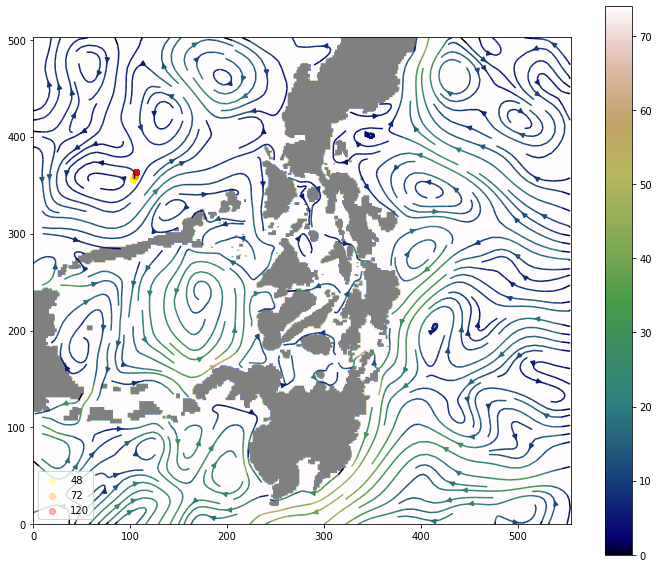

In [ ]:
x, y= np.meshgrid(np.arange(0,555,1),np.arange(0,503,1))
fig = plt.figure(figsize =(10, 8))
land = plt.imshow(np.flipud(mask.to_numpy()), alpha=0.5, cmap='gist_earth')
strm = plt.streamplot(x,y,u_flow,v_flow, color = ave_speed.to_numpy(), cmap = 'gist_earth', density=2)
fig.colorbar(strm.lines)
plt.scatter(finalxs48,finalys48,marker='o',color='yellow',label='48',alpha=0.3)
plt.scatter(finalxs72,finalys72,marker='o',color='orange',label = '72',alpha=0.3)
plt.scatter(finalxs120,finalys120,marker='o',color='red',label = '120',alpha=0.3)
# show plot
plt.legend()
plt.xlim([0, 555])
plt.ylim([0, 503])
plt.tight_layout()
plt.show()
fig.savefig('/content/gdrive/MyDrive/ps5/(100, 350)'+'var'+str(var)+'.png')

In [ ]:
gaussian_points